In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import io
from tensorflow import keras

2023-03-13 15:46:01.396281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

In [3]:
fold_0_all = '/Users/carlobarbini/Downloads/fold_0/all'
fold_0_hem ='/Users/carlobarbini/Downloads/fold_0/hem'

In [4]:
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    
    return image_paths


In [5]:
img_data = []

for i in [fold_0_all, fold_0_hem]:
    paths = get_path_image(i)
    img_data.extend(paths)

print(len(img_data))

3527


In [6]:
data = {"img_data":img_data,
        "labels":[np.nan for x in range(len(img_data))]}

data = pd.DataFrame(data) 
data["labels"][0:2938] = 1 # ALL
data["labels"][2938:] = 0 # HEM

/var/folders/r6/s0jsbpp51yz6l6sc8nk3xcbh0000gp/T/ipykernel_13880/915326938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][0:2938] = 1 # ALL
/var/folders/r6/s0jsbpp51yz6l6sc8nk3xcbh0000gp/T/ipykernel_13880/915326938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][2938:] = 0 # HEM


In [7]:
data.iloc[2930:2950, :]

,img_data,labels
2930,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2931,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2932,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2933,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2934,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2935,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2936,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2937,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,1.0
2938,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,0.0
2939,/Users/carlobarbini/Downloads/fold_0/hem/UID_H...,0.0


In [8]:
data['labels'].value_counts()

1.0    2938
0.0     589
Name: labels, dtype: int64

In [9]:
img_list = []
for i in range(len(img_data)):
    image = cv.imread(data["img_data"][i])
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx,mny:mxy,:]
    crop_img_r = cv.resize(crop_img, (224,224))
    img_list.append(crop_img_r)


In [ ]:
plt.imshow(img_list[1000])
plt.title("Sample image after cropping")
plt.show()

In [11]:
type(img_list)

list

In [12]:
data.head()

,img_data,labels
0,/Users/carlobarbini/Downloads/fold_0/all/UID_2...,1.0
1,/Users/carlobarbini/Downloads/fold_0/all/UID_4...,1.0
2,/Users/carlobarbini/Downloads/fold_0/all/UID_4...,1.0
3,/Users/carlobarbini/Downloads/fold_0/all/UID_2...,1.0
4,/Users/carlobarbini/Downloads/fold_0/all/UID_3...,1.0


In [13]:
data['images'] = img_list

In [14]:
data.head()


,img_data,labels,images
0,/Users/carlobarbini/Downloads/fold_0/all/UID_2...,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,/Users/carlobarbini/Downloads/fold_0/all/UID_4...,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,/Users/carlobarbini/Downloads/fold_0/all/UID_4...,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,/Users/carlobarbini/Downloads/fold_0/all/UID_2...,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,/Users/carlobarbini/Downloads/fold_0/all/UID_3...,1.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


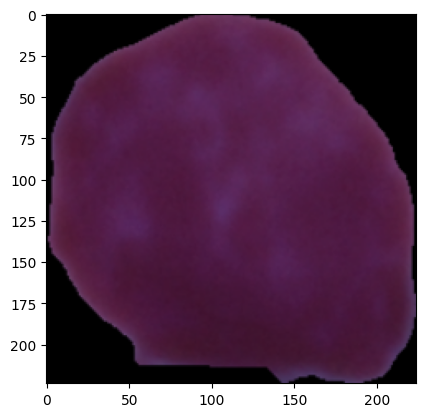

In [15]:
plt.imshow(data['images'][3526])
plt.show()

In [16]:
X = np.array(img_list)
y = np.array(data['labels'])

# shuffle the data
p = np.random.permutation(len(X))
X, y = X[p], y[p]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(2821, 224, 224, 3)
(706, 224, 224, 3)
(2821,)
(706,)


In [19]:
# from keras.applications.vgg16 import preprocess_input
    
# X_train_prep = preprocess_input(X_train)
# y_train_prep = preprocess_input(y_train)
# X_val_prep = preprocess_input(X_val)
# y_val_prep = preprocess_input(y_val)


In [21]:
from tensorflow import keras
from keras import layers, models
from keras.applications.vgg16 import VGG16
from keras import optimizers
from keras.callbacks import EarlyStopping

In [22]:
def load_base_model():

    model = models.Sequential()
    
    model.add(layers.Rescaling(1./224, input_shape=(224,224,3)))

    model.add(layers.Conv2D(16, (5, 5), input_shape = (224, 224, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(50))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
    

In [24]:
model = load_base_model()

2023-03-10 18:35:40.332600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0

In [26]:
es = EarlyStopping(patience=20)

In [30]:
print(type(X_train))
print(type(X_val))
print(type(y_train))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                          callbacks=[es], batch_size=64, epochs=100)

Epoch 1/100
12/45 [=======>......................] - ETA: 1:23 - loss: 0.0000e+00 - accuracy: 0.1693

KeyboardInterrupt: 